In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [2]:
cereals_df = pd.read_csv('Cereals.csv')

In [4]:
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [5]:
cereals_df = cereals_df.dropna()

In [6]:
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [7]:
cereals_df_norm = cereals_df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']].apply(preprocessing.scale, axis=0)

{'color_list': ['g',
  'b',
  'r',
  'c',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'b',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 3.957470924994108, 3.957470924994108, 0.0],
  [0.0, 9.211820551899688, 9.211820551899688, 3.957470924994108],
  [0.0, 2.786045772535218, 2.786045772535218, 0.0],
  [0.0, 0.884051472160011, 0.884051472160011, 0.0],
  [0.0, 5.8138209614264476, 5.8138209614264476, 0.0],
  [0.0, 1.0781676300068306, 1.0781676300068306, 0.0],
  [0.0, 5.686020982178395, 5.686020982178395, 1.0781676300068306],
  [0.0, 3.4157919654788786, 3.4157919654788786, 0.0],
  [0.0, 4.747

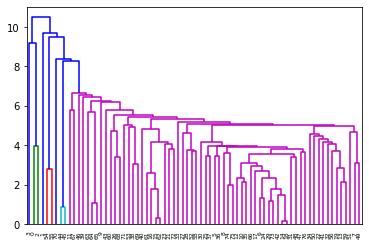

In [10]:
Z = linkage(cereals_df_norm, method='single', metric='cityblock')
dendrogram(Z, labels=cereals_df_norm.index)

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'c',
  'c',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'b',
  'b'],
 'dcoord': [[0.0, 3.3898538788515635, 3.3898538788515635, 0.0],
  [0.0, 2.130987641572795, 2.130987641572795, 0.0],
  [0.0, 3.472508421113875, 3.472508421113875, 2.130987641572795],
  [3.3898538788515635,
   6.012674338005785,
   6.012674338005785,
   3.472508421113875],
  [0.0, 4.7982513663194535, 4.7982513663194535, 0.0],
  [0.0, 3.4422994380802847, 3.4422994380802847, 0.0],
  [0.0, 3.6618804144211614, 3.6618804144211614, 0.0],
  [3.4422994380802847,
   6.401923209961

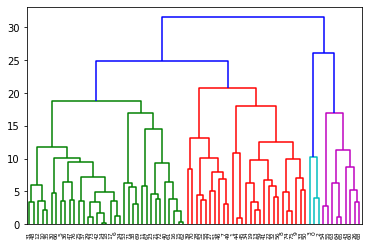

In [9]:
Z = linkage(cereals_df_norm, method='complete', metric='cityblock')
dendrogram(Z, labels=cereals_df_norm.index)

In [11]:
memb = fcluster(linkage(cereals_df_norm, method='single', metric='cityblock'), 6, criterion='maxclust')
centroids = {}
for key, item in cereals_df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 2
Cluster 2: size 1
Cluster 3: size 2
Cluster 4: size 67
Cluster 5: size 1
Cluster 6: size 1


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,-1.88,1.39,0.00,0.40,3.04,-2.26,-0.37,2.86,-0.18,0.95,-0.20,-2.10,1.55
2,-2.89,1.39,-1.00,-0.27,4.91,-1.74,-1.64,3.29,-0.18,0.95,-0.20,-1.37,3.68
3,-2.89,-0.95,-1.00,-1.98,-0.70,-0.84,-1.64,-0.94,-1.31,0.95,-3.48,0.76,1.40
4,0.15,-0.05,-0.01,0.07,-0.15,0.14,0.06,-0.14,0.02,-0.10,0.07,0.04,-0.12
5,1.67,0.46,0.00,0.34,0.76,0.07,1.59,1.87,3.20,0.95,3.08,0.76,-0.99
6,0.66,0.46,4.00,-1.79,-0.07,-1.74,0.21,0.52,-1.31,0.95,-0.20,0.76,-0.60


In [12]:
memb = fcluster(linkage(cereals_df_norm, method='complete', metric='cityblock'), 6, criterion='maxclust')
centroids = {}
for key, item in cereals_df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 21
Cluster 2: size 14
Cluster 3: size 10
Cluster 4: size 17
Cluster 5: size 3
Cluster 6: size 9


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,0.20,-0.93,0.00,0.12,-0.67,-0.55,0.96,-0.75,-0.18,-0.66,-0.20,0.28,-0.97
2,0.01,0.12,-0.50,1.01,-0.58,1.29,-0.93,-0.64,0.78,-0.18,-0.20,0.88,0.07
3,1.27,0.46,0.40,0.36,0.61,0.21,0.88,1.05,0.49,0.83,2.06,-0.48,-0.44
4,0.06,0.57,0.71,-0.19,0.31,-0.23,-0.22,0.36,-0.25,0.45,-0.20,-0.52,0.22
5,-2.22,1.39,-0.33,0.17,3.67,-2.09,-0.79,3.00,-0.18,0.95,-0.20,-1.86,2.26
6,-1.26,-0.06,-0.89,-1.95,-0.03,0.16,-1.10,-0.11,-0.81,-0.26,-1.06,0.12,1.48


In [13]:
# Q1: Single linkage in this case seems to create many 'outlier' clusters with only 1-2 records.
# Complete linkage seems to produce fairly reasonable clusters with decent stability.

In [15]:
# Q2: Complete linkage seems to produce the more meaningful clusters. Single linkage in this instance produces one large 'main' cluster and many smaller 'outlier' clusters, which may not be as useful in analysis.
# The analysis would likely not change if Euclidean distance was used, as with single and complete linkage, results are not largely influenced by choice of metric.

In [16]:
# Q3 I think complete linkage is more useful in this analysis. The data could likely be split into around 6 or 7 meaningful clusters. Looking at the dendrogram, this would translate to a cutoff of around 17.

In [17]:
# Q4 in order to prioritize forming of a 'healthy' cereal cluster, the data should not be completely normalized. Rather, less weight should be assigned to shelf, weight, cups, and rating.
# More weight should be given to the nutritional categories of interest. In this way, clusters will be formed with more basis upon nutritional value than on other factors.